In [2]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=0514999117da0d451f8f468daefb73143e9b103ea4107211c1baac7f85b10452
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean

# Initialize Spark Session
spark = SparkSession.builder.appName("BostonHousing").getOrCreate()

# 1. Load the dataset from csv file
df = spark.read.csv("/content/BostonHousing.csv", sep=",", header = True, inferSchema=True)

In [10]:
# 2. First 5 elements of the dataset
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [11]:
# 3.Number of observations in the dataset
observation_count = df.count()
print(f"Number of observations: {observation_count}")

Number of observations: 506


In [9]:
# 4. Schema of the dataset
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [12]:
# 5. Drop the column "b" from the dataset
df = df.drop("b")

In [13]:
# 6. Round all of the numerical columns into two decimal places
numerical_columns = [col.name for col in df.schema.fields if col.dataType in ('IntegerType', 'LongType', 'DoubleType')]
df = df.select([round(col(c), 2).alias(c) if c in numerical_columns else c for c in df.columns])

In [14]:
# 7. Create a new column (Age10) with 10% increase of 'age' column
df = df.withColumn("Age10", col("age") * 1.1)

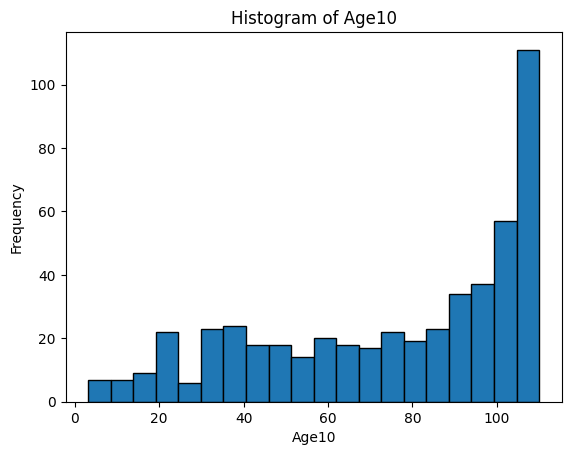

In [15]:
# 8. Plot histogram Age10 column on a 2D Plot

import matplotlib.pyplot as plt # importing matplotlib

# 10. Creating a pandas dataframe
pandas_df = df.toPandas()

plt.hist(pandas_df['Age10'], bins=20, edgecolor='k')
plt.xlabel('Age10')
plt.ylabel('Frequency')
plt.title('Histogram of Age10')
plt.show()

In [16]:
# 9. Summary Statistics of all columns (count, mean, stddev, min, max)
summary_stats = df.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|              506|              

In [17]:
# Spark Dataframe to Pandas Dataframe (refer cell 15)
pandas_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,71.72
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,86.79
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,67.21
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,50.38
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,59.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,76.01
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,84.37
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,100.10
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,98.23


In [18]:
# 11. Last 5 rows of Pandas DataFrame
print(pandas_df.tail(5))

        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

     lstat  medv   Age10  
501   9.67  22.4   76.01  
502   9.08  20.6   84.37  
503   5.64  23.9  100.10  
504   6.48  22.0   98.23  
505   7.88  11.9   88.88  
